In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Aproximação de Taylor
- Toda função escalar suave $g$ pode ser aproximada no ponto $a$ por uma função $f$ da seguinte forma:
$$
f(x)=g(a)+\nabla g(a)^{\top}(x-a)
$$
onde
$$
\nabla g(a)=
\left[
\begin{array}{c}
\frac{\partial g}{\partial x_1}(a)\\
\frac{\partial g}{\partial x_1}(a)\\
\vdots\\
\frac{\partial g}{\partial x_n}(a)\\
\end{array}
\right]
$$

### Exemplo de função afim: aproximação de Taylor de função $g_1$ em um ponto $x_0$
- $g_1(x)=e^{-x^{\top}x}=e^{-x_1^2-x_2^2}$, $x_0=(0.3,0.1)$.
- A aproximação de Taylor de $g_1$ em $x_0$ é:
$$
\begin{array}{rcl}
f(x)&=&g_1(x_0)+\nabla g_1(x_0)^{\top}(x-x_0)\\
    &=&\nabla g_1(x_0)^{\top}x+\left(g_1(x_0)-\nabla g_1(x_0)^{\top}x_0\right)\\
    &=&a^{\top}x+b\\
\end{array}
$$

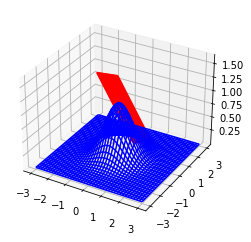

In [1]:
# aproximação de Taylor no ponto x0 da função g1
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits import mplot3d

x0=array([0.3,0.1])
d=array([1,1])
n=40

def g1(x):
    return exp(-x[0]**2-x[1]**2)

def gradg1(x):
    return -2*x*g1(x)

def aproxTaylorg1(x):
    return g1(x0) + gradg1(x0) @ (x-x0)

plt.figure(1)
ax = plt.axes(projection='3d')

# gráfico do ponto (x0,g1(x0))
ax.plot3D([x0[0]],[x0[1]],[g1(x0)],'ko')

# gráfico de g1 em [-a1,a1]x[-a2,a2]
a1,a2=3,3
x=linspace(-a1,a1,n)
y=linspace(-a2,a2,n)
X, Y = meshgrid(x, y)
Z=g1(array([X,Y]))
#ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z, color='b')

# gráfico da    em x0 em [-a1,a1]x[-a2,a2]
a1,a2=1,1
x=linspace(x0[0]-a1,x0[0]+a1,n)
y=linspace(x0[1]-a2,x0[1]+a2,n)
X, Y = meshgrid(x, y)
Z=zeros((n,n))
for i in range(n):
    for j in range(n):
        x=array([X[i,j],Y[i,j]])
        Z[i,j]=aproxTaylorg1(x)
ax.plot_wireframe(X, Y, Z, color='r')#, rstride=10, cstride=10)

### Exemplo de função afim: aproximação de Taylor de função $g_2$ em um ponto $0$
- $g_2(t)=e^{-(x_0+td)^{\top}(x_0+td)}$, $x_0=(0.3,0.1)$, $d=(1,1)$.
- A aproximação de Taylor de $g_2$ em $0$ é:
$$
\begin{array}{rcl}
f(t)&=&g_2(0)+g_2'(0)(t-0)\\
    &=&at+b\\
\end{array}
$$

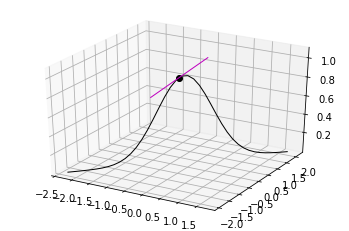

In [3]:
# aproximação de Taylor no ponto x0 da função g1
# aproximação de Taylor no ponto 0  da função g2
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits import mplot3d

x0=array([-0.3,0.1])
d=array([1,1])
n=40

def g1(x):
    return exp(-x[0]**2-x[1]**2)

def gradg1(x):
    return -2*x*g1(x)

def g2(t):
    return g1(x0+t*d)

def gradg2(t):
    return gradg1(x0) @ d

def aproxTaylorg2(t):
    return g2(0) + gradg2(t)*(t-0)

plt.figure(1)
ax = plt.axes(projection='3d')

# gráfico do ponto (x0,g1(x0))
ax.plot3D([x0[0]],[x0[1]],[g1(x0)],'ko')

# gráfico de g2 em [-a,a]
a=2
t=linspace(-a,a,n)
P=zeros((3,t.size))
for j in range(t.size):
    P[0:2,j]=x0+t[j]*d
    P[2,j]=g2(t[j])
ax.plot3D(P[0,:],P[1,:],P[2,:],linewidth=1,color='k')

# gráfico da aproxTaylorg2 em [-a,a]
a=.5
t=linspace(-a,a,n)
P=zeros((3,n))
for j in range(n):
    P[0:2,j]=x0+t[j]*d
    P[2,j]=aproxTaylorg2(t[j])
ax.plot3D(P[0,:],P[1,:],P[2,:],linewidth=1,color='m')

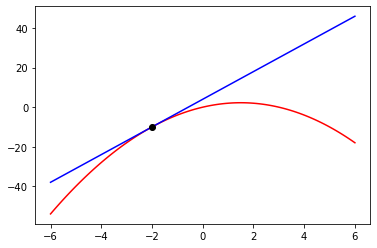

In [6]:
# aproximação de Taylor no ponto x0 da função g
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits import mplot3d

x0=-2

def g(x):
    return -x*x+3*x

def gradg(x):
    return -2*x+3

def aproxTaylorg(x):
    return g(x0) + gradg(x0) * (x-x0)

# gráfico de g em [-a,a]
a = 6
n = 100
x = linspace(-a,a,n)
plt.plot(x,g(x),'r')
plt.plot(x,aproxTaylorg(x),'b')
plt.plot(x0,g(x0),'ko');

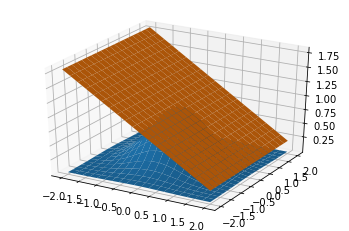

In [23]:
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits import mplot3d
a=array([-0.3,0.1])
def g(x):
    return exp(-x[0]**2-x[1]**2)
def dg(x):
    return -2*x*g(x)
def taylor(x,a,f,df):
    return f(a)+df(a)@(x-a)
x=linspace(-2,2,20)
y=linspace(-2,2,20)
X, Y = meshgrid(x, y)
Z=g(array([X,Y]))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
Z2=taylor(array([X,Y]),0.01*array([ones_like(X),ones_like(Y)]),g,dg)
ax.plot_surface(X, Y, Z2[0])

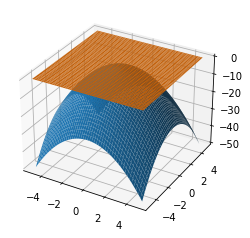

In [4]:
import matplotlib.pyplot as plt
from numpy import *
from mpl_toolkits import mplot3d

a=array([0.0,0.0])

def g(x):
    return -x[0]**2-x[1]**2
def dg(x):
    return -2*x
def taylor(x,a,f,df):
    return f(a) + df(a)@(x-a)
x=linspace(-5,5,200)
y=linspace(-5,5,200)
X, Y = meshgrid(x, y)
Z=g(array([X,Y]))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
Z2=taylor(array([X,Y]),array([zeros_like(X),zeros_like(Y)]),g,dg)
ax.plot_surface(X, Y, Z2[0])

## Exemplo de função afim: aproximação de Taylor de função em um ponto
- Seja $g(x)=sin(x)$ e $x_0=1$.
- A aproximação de Taylor de $g$ em $x_0$ é:
$$
\begin{array}{rcl}
f(x)&=&g(x_0)+g'(x_0)(x-x_0)\\
    &=&ax+b\\
\end{array}
$$

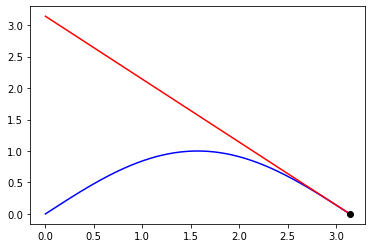

In [3]:
from numpy import *
import matplotlib.pyplot as plt

x0=pi

def g(x):
    return sin(x)

def dg(x):
    return cos(x)

def f(x):
    return g(x0)+dg(x0)*(x-x0)

x=linspace(0,pi,num=500)
y=g(x)
plt.plot(x,y,'b')
plt.plot(x,f(x),'r')
plt.plot(x0,f(x0),'ko')
